Label: 1


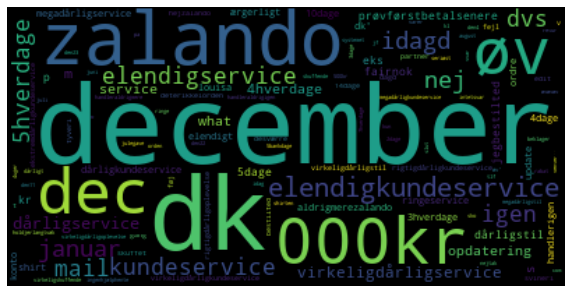

Label: 2


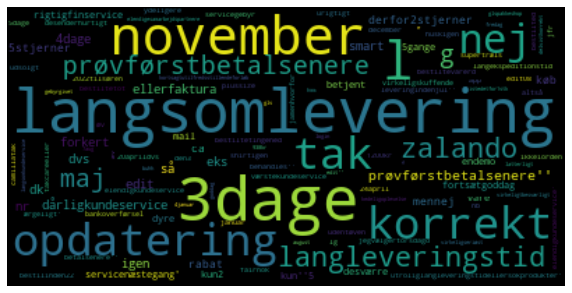

Label: 3


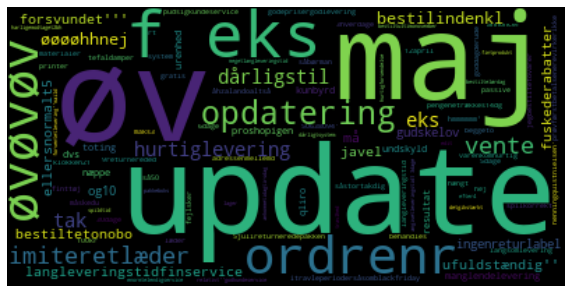

Label: 4


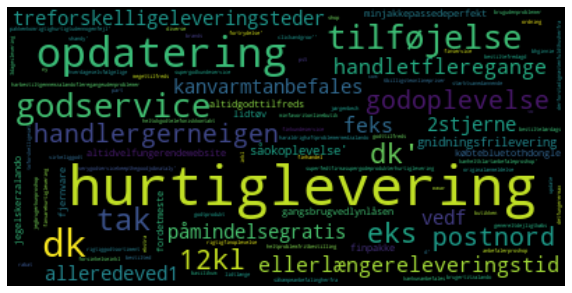

Label: 5


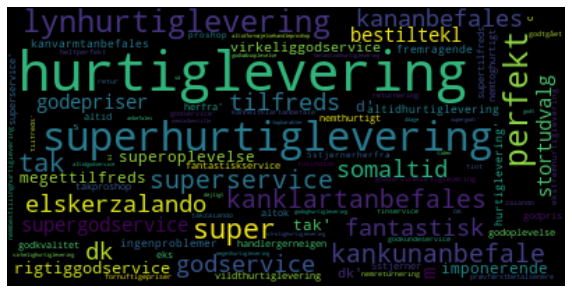

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk.download('stopwords')
#nltk.download('punkt')



df = pd.read_csv("ProShop_Zalando_test.csv")

df.columns = ["rating", "review"]

labels = ['__label__1 ','__label__2 ','__label__3 ','__label__4 ','__label__5 ']

stopwords = set(stopwords.words('danish'))
stopwords.update(['d','a'])

counter = 0

for i in labels:

    #selectLabels = [i]
    label = df[df['rating'].isin([i])]
    
    counter += 1
    print('Label:', counter )
    rawlist = list(label.review)
    rawlist = str(rawlist)

    word_tokens = word_tokenize(rawlist)

    filtered_sentence = [w for w in word_tokens]

    shortlisted_words= filtered_sentence

    for w in word_tokens:
        if w not in stopwords:
            filtered_sentence.append(w)

    words =''.join(str(item) for item in filtered_sentence)

    #CREATE NEW WORDCLOUD WITH NEW SENTENCE WITH REMOVED STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords).generate(words)
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
